# Visualises the results from the gridding analysis on the SVZ seqFISH+ data

INPUT: 
 * /Volumes/GML001-Q1851/Brad/seqFISH/svz_gridded.h5ad

OUTPUT: 
 * plots/X4_seqFISH/grid_*
 
 ## Environment Setup

In [1]:
# TODO change this to your directory
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/mainfigCCI_newCCISupps/'
import os
os.chdir(work_dir)

import scanpy as sc
import matplotlib.pyplot as plt

import scripts.utils.visualisation.helpers as vhs

import stlearn as st

data_dir = '/Volumes/GML001-Q1851/Brad/seqFISH/'
out_plots = 'plots/seqFISH/grid_'

## Loading the data

In [2]:
data = sc.read_h5ad(data_dir+'svz.h5ad')
grid_data = sc.read_h5ad(data_dir+'svz_gridded.h5ad')

## Visualising results of gridding

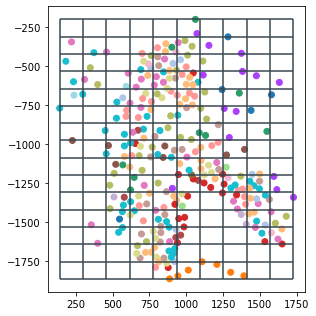

In [3]:
# Looking at how the gridding was actually done, visualised on original data #
xedges = grid_data.uns['grid_xedges']
yedges = grid_data.uns['grid_yedges']
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)
fig, ax = plt.subplots(figsize=(4.5,4.5))
#sc.pl.spatial(data, color='cell_type', show=False, ax=ax)
xs = data.obs["imagecol"].values
ys = data.obs["imagerow"].values 
color_map = {}
for i, ct in enumerate(data.obs['cell_type'].cat.categories):
    color_map[ct] = data.uns['cell_type_colors'][i]
cell_colors = [color_map[ct] for ct in data.obs['cell_type']]
ax.scatter(xs, -ys, c=cell_colors)
ax.vlines(xedges, -ymin, -ymax, color='#36454F')
ax.hlines(-yedges, xmin, xmax, color='#36454F')
vhs.dealWithPlot(True, True, True, out_plots, 'orig_points.pdf', 300)

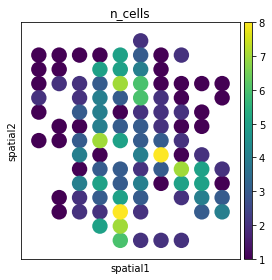

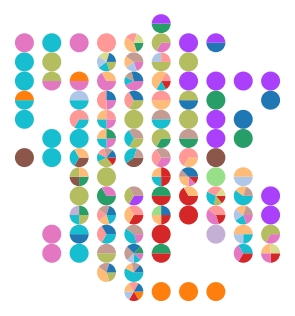

In [4]:
sc.pl.spatial(grid_data, color='n_cells', show=False, size=2)
vhs.dealWithPlot(True, True, True, out_plots, 'n_cells.pdf', 300)

st.pl.deconvolution_plot(grid_data, show_donut=False, spot_size=55,
                         celltype_threshold=0, show=False, figsize=(4.5,4.5),
                         colors=grid_data.uns['cell_type_colors'])
vhs.dealWithPlot(True, True, True, out_plots, 'cell_types.pdf', 300)

## Visualising results of Gas6-Axl for comparison with non-gridding method

/Users/uqbbalde/Desktop/Uni_Studies/myPython/stlearn_latest/stLearn/stlearn/plotting/classes.py:185: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=self.cmap,


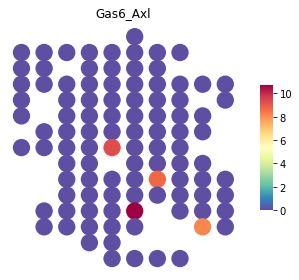

/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


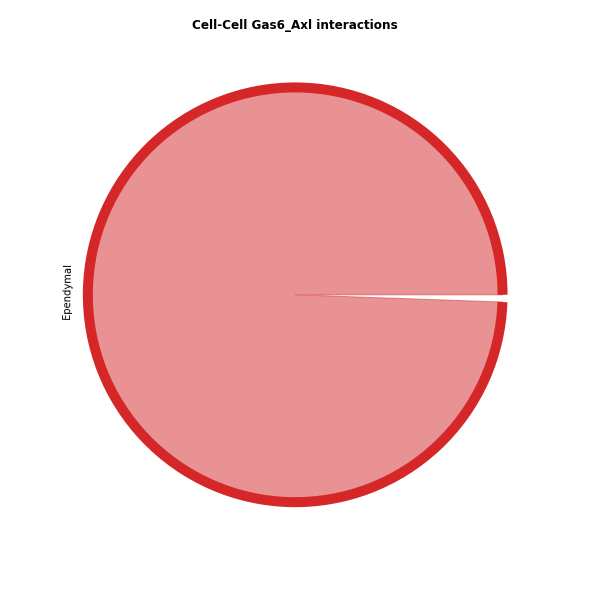

/Users/uqbbalde/Desktop/Uni_Studies/myPython/BeautifulCells/beautifulcells/visualisation/helpers.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


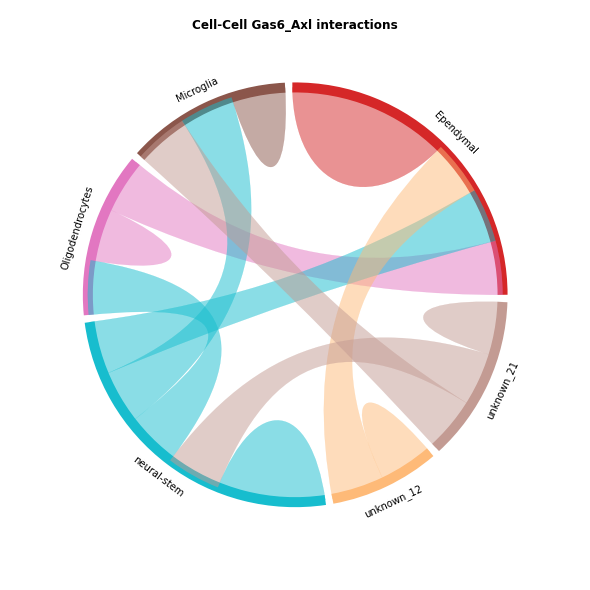

In [11]:
st.pl.lr_result_plot(grid_data, 'Gas6_Axl', 'lr_sig_scores', size=300)
vhs.dealWithPlot(True, True, True, out_plots, 'Gas6-Axl_lr-scores.pdf', 300)

st.pl.lr_chord_plot(grid_data, 'cell_type', 'Gas6_Axl', show=False)
vhs.dealWithPlot(True, True, True, out_plots, 'Gas6-Axl_sig-ccis.pdf', 300)

st.pl.lr_chord_plot(grid_data, 'cell_type', 'Gas6_Axl', show=False, 
                    sig_interactions=False, min_ints=0)
vhs.dealWithPlot(True, True, True, out_plots, 'Gas6-Axl_ccis.pdf', 300)
